In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
# %matplotlib.inline





In [29]:
df = pd.read_csv("../data/Data_USD.csv")
df.head()

,LIMIT_BAL_US,SEX,EDUCATION,MARRIAGE,AGE,PAY_SCORE_AVG,BILL_AVG_US,PAY_AMT_AVG_US,PAY_TO_BILL,CREDIT_UTILIZATION,DEFAULT_PAYMENT_NEXT_MO
0,725.714286,2,2,1,24,-0.33,46.590857,4.166810,0.09,0.195650,1
1,4354.285714,2,2,2,26,0.50,103.275191,30.238095,0.29,0.022350,1
2,3265.714286,2,2,2,34,0.00,614.758619,66.632667,0.11,0.324878,0
3,1814.285714,2,2,1,37,0.00,1399.019905,50.727429,0.04,0.939800,0
4,1814.285714,1,2,1,57,-0.33,661.240619,357.105857,0.54,0.172340,0


In [30]:
print("Original shape of the data: "+ str(df.shape))
features_names = df.columns

Original shape of the data: (30000, 11)


In [31]:
X = df.drop('DEFAULT_PAYMENT_NEXT_MO', axis =1).values
y = df['DEFAULT_PAYMENT_NEXT_MO'].values
print(X.shape)
print(y.shape)


(30000, 10)
(30000,)


Split my data into training and testing

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
features_names

Index(['LIMIT_BAL_US', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SCORE_AVG',
       'BILL_AVG_US', 'PAY_AMT_AVG_US', 'PAY_TO_BILL', 'CREDIT_UTILIZATION',
       'DEFAULT_PAYMENT_NEXT_MO'],
      dtype='object')

Instantiate the random forest model with 200 trees

In [34]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Check feature importance


In [35]:
sorted(zip(rf.feature_importances_, features_names), reverse=True) 

[(0.19120350542101516, 'PAY_SCORE_AVG'),
 (0.14943098646740244, 'PAY_AMT_AVG_US'),
 (0.14446931651542427, 'CREDIT_UTILIZATION'),
 (0.14319769727297627, 'BILL_AVG_US'),
 (0.11645098497300747, 'AGE'),
 (0.096225102763803708, 'LIMIT_BAL_US'),
 (0.08153505977363508, 'PAY_TO_BILL'),
 (0.034083311538868004, 'EDUCATION'),
 (0.022604523309362197, 'MARRIAGE'),
 (0.020799511964505447, 'SEX')]

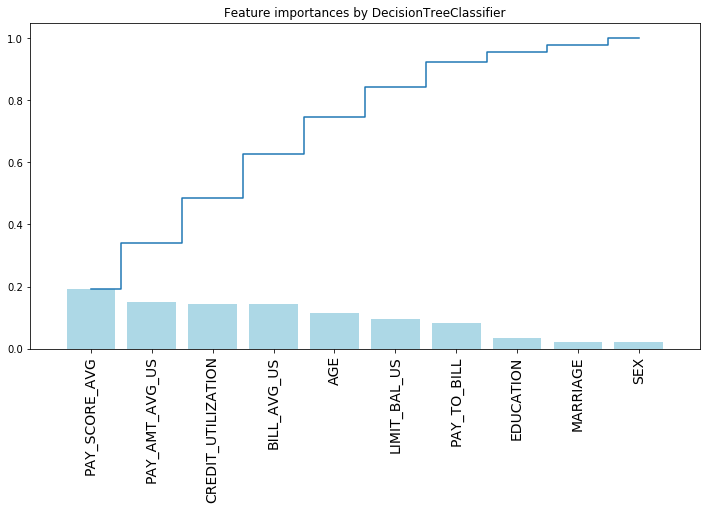

In [36]:
## plot the importances ##
import matplotlib.pyplot as plt
importances = rf.feature_importances_


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), features_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

# Making my prediction and seeing how well my model predicted by checking recall, precision, F1 score and making a confusion matrix.

Recall -tells us generally or overall how well our model predicted based on 
        the total of how much it correctly predicted /correctly predicted +                           how many where actually right but predicted wrong.
                        
                        formula = TP/TP+FN
                        
Precision -tells us or gives us true measure how well our model predicted it                              shows correctly predicted /correctly predicted + how many the model                            predicted to be positive but where false.

                       formula = TP/TP+FP
                       
F1 score - gives us a mean of precision and recall, a sumarization of how well it                        did in respect to recall and precision.


In [37]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [38]:
#Make my predictions
y_prediction = rf.predict(X_test)
y_probability = rf.predict_proba(X_test)
y_probability[0][1]

0.29999999999999999

In [39]:
print("Recall score:"+ str(recall_score(y_test, y_prediction)))

Recall score:0.314179796108


In [41]:
# This shows overall acuracy of how well it will predict defualt or non_default
# The scores corresponding to every class will tell you the accuracy of the classifier 
# in classifying the data points in that particular class compared to all other classes.
# The support is the number of samples of the true response that lie in that class.

print(classification_report(y_test, y_prediction,
                            target_names=["non_default", "default"]))

             precision    recall  f1-score   support

non_default       0.83      0.93      0.88      7742
    default       0.57      0.31      0.41      2158

avg / total       0.77      0.80      0.78      9900



In [42]:
# Creating confusion matrix would give us a ration of non-default compared 
# to default.

In [43]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

In [44]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    


Confusion matrix, without normalization
[[7238  504]
 [1480  678]]


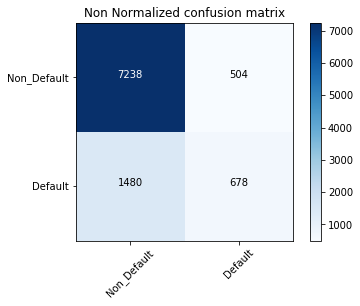

In [46]:
cnf_matrix = confusion_matrix(y_test, y_prediction)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_Default', 'Default'], normalize=False,
                      title='Non Normalized confusion matrix')


# Explanation of this confusion matrix
In our confusion matrix, the non-default classification has a total of 2,158 points and defualt clssification has a total of 7,742 points.

It correctly identified 7239 points as default and 503 points as non-default.

Non_default classification incorectly predicted 1480 points as default  and correctly classified 678 points as Non defualt. 


Normalized confusion matrix
[[ 0.93490054  0.06509946]
 [ 0.6858202   0.3141798 ]]


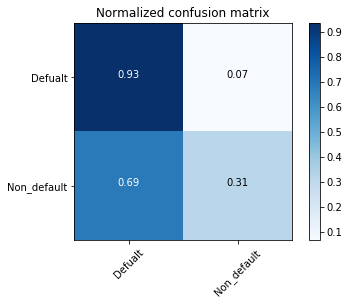

In [47]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Defualt', 'Non_default'], normalize=True,
                      title='Normalized confusion matrix')


In [48]:
import pickle
filename = 'RandomForest_model.sav'
pickle.dump(rf, open(filename, 'wb'))